


# **Installation of the necessary libraries**




In [3]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **After installing we are importing the libraries. We are setting up visualization and output size to our preference.**

In [4]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

<Figure size 720x576 with 0 Axes>

## **We are fetching the first 150 classified data with 'Id', 'CreationDate', 'AcceptedAnswerId', 'Score', 'Body', 'AnswerCount' and 'Status'. We then replace the accepted answers column values with "EXISTS" or "NOT EXISTS" based on the condition.** 

In [7]:
df=pd.read_csv('../Data/final_out.csv')  
df_one = df[['Id','CreationDate','AcceptedAnswerId','Score','Body','AnswerCount','Status']]

df_two = df_one.head(151)
df_two['AcceptedAnswers'] = df_two['AcceptedAnswerId'].apply(lambda x:'NOT EXISTS' if x=="NaN" else "EXISTS")

df_three = df_two.drop('AcceptedAnswerId', axis='columns')
status_rows = df_three.Status.count()
df_three.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Id,CreationDate,Score,Body,AnswerCount,Status,AcceptedAnswers
0,65567880,2021-01-04 18:27:10,0,"<p>I want to group by a multiple fields of a collection\n<a href=""https://i.stack.imgur.com/m5JfN.png"" rel=""nofollow noreferrer""><img src=""https://i.stack.imgur.com/m5JfN.png"" alt=""enter image description here"" /></a></p>\n<p>based on entityname, jurisdiction, source group the values and stored in a list\nI am expecting out put like\n[A PACIFIC TRADING POST &amp; LOGO SHOPPE,United States,Hawaii Business Express]=[Alternative_names:A PACIFIC TRADING POST &amp; LOGO SHOPPE (&amp; DESIGN OF OCEAN WITHSUN, SAILBOAT, CLOUDS, 2 ISLANDS, BANNER OVER A CIRCULAR BAND, 2 PALM TREES, 2 FLOWERS AT BASE OF ONE TREE), Identifiers.Other_company_id_number:25510 G5, Identifiers.Name:A PACIFIC TRADING POST &amp; LOGO SHOPPE, status:Inv. Cancelled, Address.Full_address:140 N KALAHEO AVE STE BKAILUA, Hawaii 96734, UNITED STATES, Address.country:United States]</p>\n<pre><code>Map&lt;List&lt;String&gt;, List&lt;String&gt;&gt; map = Files.lines(Path.of(file)).skip(1).map(s -&gt; s.split(&quot;:&quot;))\n .limit(10).collect(Collectors.groupingBy(arr -&gt; Arrays.asList(arr[0], arr[2]),\n Collectors.mapping(arr -&gt; arr[1], Collectors.toList())));\nSystem.out.println(map);\n</code></pre>\n<p>and i am getting</p>\n<pre><code> java.lang.ArrayIndexOutOfBoundsException: Index 2 out of bounds for length 1\n\n\n\nMap&lt;List&lt;String&gt;, List&lt;String&gt;&gt; map5 = Files.lines(Path.of(file), StandardCharsets.ISO_8859_1)\n .skip(1).map(s -&gt; s.split(&quot;,&quot;)).filter(arr -&gt; arr.length &gt; 1).collect(\n Collectors.groupingBy(arr -&gt; Arrays.asList(arr[0], arr.length &gt; 2 ? arr[3] : &quot;EMPTY&quot;),\n Collectors.mapping(strings -&gt; String.join(&quot;:&quot;, strings),\n Collectors.toList())));\n\nSystem.out.println(&quot;map values are : &quot; + map5);\n</code></pre>\n",1,RMM,EXISTS
1,66307249,2021-02-21 21:21:30,0,"<p>I am doing a simple project in java swing, just to make time pass.\nWhen I try to start the application, it gives me this error:</p>\n<pre><code> Java HotSpot(TM) 64-Bit Server VM warning: Sharing is only supported for boot loader classes because bootstrap classpath has been appended\nException in thread &quot;main&quot; java.lang.UnsatisfiedLinkError: D:\Java\bin\awt.dll: Routine di inizializzazione della libreria di collegamento dinamico (DLL) non riuscita\n at java.base/jdk.internal.loader.NativeLibraries.load(Native Method)\n at java.base/jdk.internal.loader.NativeLibraries$NativeLibraryImpl.open(NativeLibraries.java:383)\n at java.base/jdk.internal.loader.NativeLibraries.loadLibrary(NativeLibraries.java:227)\n at java.base/jdk.internal.loader.NativeLibraries.loadLibrary(NativeLibraries.java:169)\n at java.base/jdk.internal.loader.NativeLibraries.findFromPaths(NativeLibraries.java:310)\n at java.base/jdk.internal.loader.NativeLibraries.loadLibrary(NativeLibraries.java:280)\n at java.base/java.lang.ClassLoader.loadLibrary(ClassLoader.java:2416)\n at java.base/java.lang.Runtime.loadLibrary0(Runtime.java:809)\n at java.base/java.lang.System.loadLibrary(System.java:1893)\n at java.desktop/java.awt.Toolkit$2.run(Toolkit.java:1380)\n at java.desktop/java.awt.Toolkit$2.run(Toolkit.java:1378)\n at java.base/java.security.AccessController.doPrivileged(AccessController.java:312)\n at java.desktop/java.awt.Toolkit.loadLibraries(Toolkit.java:1377)\n at java.desktop/java.awt.Toolkit.&lt;clinit&gt;(Toolkit.java:1410)\n at java.desktop/java.awt.Component.&lt;clinit&gt;(Component.java:622)\n at com.company.Main.main(Main.java:6)\n\n</code></pre>\n<p>Here's the code (I got 3 classes):</p>\n<p>this is the class page:</p>\n<pre><code>package com.company;\n\nimport javax.swing.*;\nimport java.awt.*;\n\npublic class Page extends JFrame {\n Header header = new Header();\n public Page(){\n super(&quot;FW Ultra&quot;);\n this.setSize(1000, 700);\n this.setDefaultCloseOperation(JFrame.EXIT_ON_CLOSE);\n this.getContentPane().setLayout(new

## **We try to find the total number of values for:**

## **RWM: Reproducible Without Modification**

## **RMM: Reproducible with Minor Modification** 

## **RMJM: Reproducible with Major Modification** 
## **REP: Reproducible**

In [ ]:
RMM_count = df_three.Status.value_counts().RMM
RMJM_count = df_three.Status.value_counts().RMJM
RWM_count = df_three.Status.value_counts().RWM
REP = RMM_count+RMJM_count+RWM_count

## **We try to find the total number of values for:**

## **IREP- Irreproducible**
## **IAC - Inacurate Claim**
## **IDEF - Ill Defined Issue**

In [ ]:
IDEF_count = df_three.Status.value_counts().IDEF
IAC_count = df_three.Status.value_counts().IAC
IREP_count = df_three.Status.value_counts().IREP

## **Percentage calculation for each of the categories mentioned above**

In [ ]:
RMM_percentage = (RMM_count * 100)/ REP 
RMJM_percentage = (RMJM_count * 100)/ REP 
RWM_percentage = (RWM_count * 100)/ REP 
REP_percentage = (REP*100)/status_rows
IREP_percentage  =  (IREP_count * 100)/ status_rows
IAC_percentage  =  (IAC_count * 100)/ status_rows
IDEF_percentage  =  (IDEF_count * 100)/ status_rows

In [ ]:
REP_dict = {'RMM':[RMM_percentage] , 'RMJM': [RMJM_percentage],
                   'RWM':[RWM_percentage]}
print(REP_dict)

{'RMM': [33.8235294117647], 'RMJM': [36.76470588235294], 'RWM': [29.41176470588235]}


## **Plot for comparing percentages between the three categories under "Reproducibility" status in the data collected.**

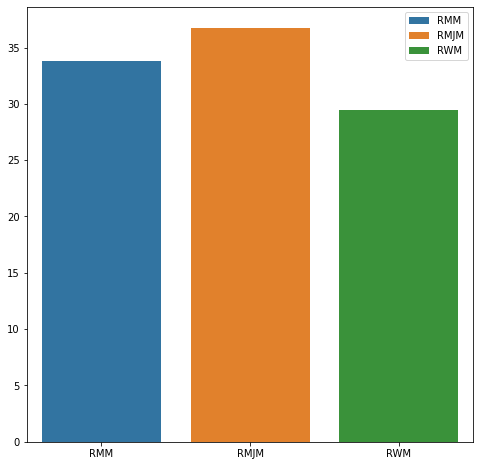

In [ ]:
keys = list(REP_dict.keys())
# get values in the same order as keys, and parse percentage values
vals = [RMM_percentage, RMJM_percentage, RWM_percentage]
sns.barplot(x=keys, y=vals, hue=keys, dodge = False)

In [ ]:
IREP_dict = {'REP':[REP_percentage] , 'IREP': [IREP_percentage],
                   'IAC':[IAC_percentage], 'IDEF':[IDEF_percentage]}
print(IREP_dict)

{'REP': [45.333333333333336], 'IREP': [18.666666666666668], 'IAC': [7.333333333333333], 'IDEF': [24.0]}


### **Plot for comparing percentages between "Reproducibility" status in the data collected and the three categories under "Irreproducibility".**

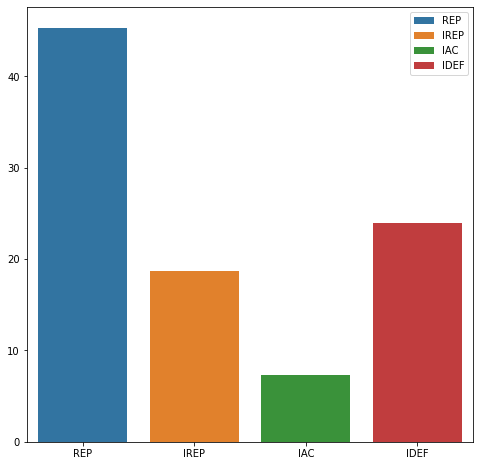

In [ ]:
keys = list(IREP_dict.keys())
# get values in the same order as keys, and parse percentage values
vals = [REP_percentage, IREP_percentage, IAC_percentage, IDEF_percentage]
sns.barplot(x=keys, y=vals, hue=keys, dodge = False)

## **Fetching data for "Reproducible" and "Irreproducible" status given Accepted answers exist.**

In [ ]:
RMM_yes = df_three[(df_three['Status']=="RMM") & (df_three['AcceptedAnswers']=="EXISTS")].Status.count()
RMJM_yes = df_three[(df_three['Status']=="RMJM") & (df_three['AcceptedAnswers']=="EXISTS")].Status.count()
RWM_yes = df_three[(df_three['Status']=="RWM") & (df_three['AcceptedAnswers']=="EXISTS")].Status.count()

IREP_yes = df_three[(df_three['Status']=="IREP") & (df_three['AcceptedAnswers']=="EXISTS")].Status.count()
IAC_yes = df_three[(df_three['Status']=="IAC") & (df_three['AcceptedAnswers']=="EXISTS")].Status.count()
IDEF_yes = df_three[(df_three['Status']=="IDEF") & (df_three['AcceptedAnswers']=="EXISTS")].Status.count()

## **Fetching data for "Reproducible" and "Irreproducible" status given Accepted answers do not exist.**

In [ ]:
RMM_no = df_three[(df_three['Status']=="RMM") & (df_three['AcceptedAnswers']=="NOT EXISTS")].Status.count()
RMJM_no = df_three[(df_three['Status']=="RMJM") & (df_three['AcceptedAnswers']=="NOT EXISTS")].Status.count()
RWM_no = df_three[(df_three['Status']=="RWM") & (df_three['AcceptedAnswers']=="NOT EXISTS")].Status.count()

IREP_no = df_three[(df_three['Status']=="IREP") & (df_three['AcceptedAnswers']=="NOT EXISTS")].Status.count()
IAC_no = df_three[(df_three['Status']=="IAC") & (df_three['AcceptedAnswers']=="NOT EXISTS")].Status.count()
IDEF_no = df_three[(df_three['Status']=="IDEF") & (df_three['AcceptedAnswers']=="NOT EXISTS")].Status.count()

## **Dataframe for Reproducible and Irreproducible data with accepted answers present and otherwise.**

In [ ]:
REP_yes = RMM_yes+RMJM_yes+RWM_yes
REP_no = RMM_no+RMJM_no+RWM_no

dic_val = {'Accepted Answers Present':[REP_yes,IREP_yes], 'Accepted Answers Not present':[REP_no,IREP_no]}

table_one = pd.DataFrame(dic_val, index=['Reproducible data','Irreproducible data'])
table_one

,Accepted Answers Present,Accepted Answers Not present
Reproducible data,68,0
Irreproducible data,28,0


## **Dataframe for Percentage representation of Reproducible and Irreproducible data.**

In [ ]:
REP_yes_percentage = (REP_yes * 100)/ status_rows
IREP_yes_percentage = (IREP_yes * 100)/status_rows

REP_no_percentage = (REP_no * 100)/ status_rows
IREP_no_percentage = (IREP_no * 100)/status_rows
dict_val = {'REP and IREP Yes':[REP_yes_percentage,IREP_yes_percentage], 'REP and IREP No':[REP_no_percentage,IREP_no_percentage]}

rep_percentage_table= pd.DataFrame(dict_val, index=['Reproducible data','Irreproducible data'])
rep_percentage_table

,REP and IREP Yes,REP and IREP No
Reproducible data,45.333333,0.0
Irreproducible data,18.666667,0.0
